In [1]:
import pandas as pd
import numpy as np

In [2]:
sol=pd.read_csv('SMILES-DATA.csv')
sol

,SMILES,RESULT
0,C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3,0
1,CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C,0
2,CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1,0
3,C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1,0
4,C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1,0
...,...,...
1823,CS(=O)(=O)NCC1COCCN1C(=O)C=C,1
1824,COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C,1
1825,C[C@@H](NC(=O)C=C)C=1C=NC=CN1,1
1826,CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C,1


In [3]:
sol.SMILES

0         C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3
1       CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C
2              CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1
3           C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1
4            C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1
                        ...                  
1823             CS(=O)(=O)NCC1COCCN1C(=O)C=C
1824        COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C
1825            C[C@@H](NC(=O)C=C)C=1C=NC=CN1
1826     CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C
1827            C=CC(=O)N1CCC=2C1=CC=CC2C3CC3
Name: SMILES, Length: 1828, dtype: object

In [4]:
sol.SMILES[8]

'C=CC(=O)N1CCN(CC1)S(=O)(=O)CC=2C=CON2'

In [5]:
from rdkit import Chem
from rdkit.Chem import rdFMCS

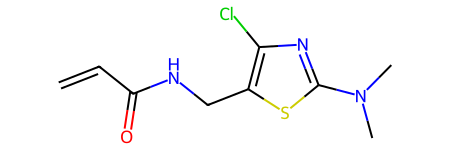

In [6]:
Chem.MolFromSmiles(sol.SMILES[2]) 

In [7]:
for smiles in sol.SMILES[:1]:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
       
        img = Chem.Draw.MolToImage(mol)
        img.show()
        print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x1BF2AA616C0>


In [8]:
mol_list=[]
for element in sol.SMILES:
    mol=Chem.MolFromSmiles(element)
  
    mol_list.append(mol)

In [9]:
len(mol_list)

1828

In [10]:
mol_list[:5]

In [11]:
sol.head()

,SMILES,RESULT
0,C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3,0
1,CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C,0
2,CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1,0
3,C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1,0
4,C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1,0


In [12]:
X=sol.drop(['RESULT'],axis='columns')
Y=sol['RESULT']


In [16]:
X

,SMILES
0,C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3
1,CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C
2,CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1
3,C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1
4,C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1
...,...
1823,CS(=O)(=O)NCC1COCCN1C(=O)C=C
1824,COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C
1825,C[C@@H](NC(=O)C=C)C=1C=NC=CN1
1826,CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C


In [17]:
Y.value_counts()

0    1600
1     228
Name: RESULT, dtype: int64

In [18]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys

fp = MACCSkeys.GenMACCSKeys(mol)
fp

In [19]:
fp_string = fp.ToBitString()
fp_array = np.array(list(fp_string), dtype=int)
fp_string

'00000000000000000000001000000000001000000000000000000000000000100000000000010000000101000000100010011100010000110000011001100000100000010100000010011000011010100111110'

In [20]:
fp_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [21]:
len(fp_string)

167

In [22]:
fp_array.shape

(167,)

In [23]:

def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = MACCSkeys.GenMACCSKeys(mol)
    fingerprint = np.array(list(fp.ToBitString()), dtype=int)
    return fingerprint

sol['Fingerprint'] = sol['SMILES'].apply(smiles_to_fingerprint)

X = sol[['Fingerprint']]
X

sol['Fingerprint_Sum'] = sol['Fingerprint'].apply(lambda x: x.sum())

average_fingerprint_sum = sol['Fingerprint_Sum'].mean()

print(sol['Fingerprint_Sum'])
print(average_fingerprint_sum)

0       33
1       31
2       47
3       42
4       43
        ..
1823    67
1824    46
1825    23
1826    47
1827    33
Name: Fingerprint_Sum, Length: 1828, dtype: int32
39.35284463894967


<Axes: >

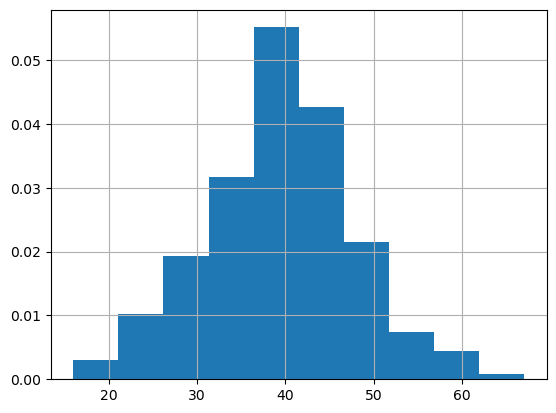

In [24]:
sol['Fingerprint_Sum'].hist(density=1)

In [25]:
fingerprints = sol['Fingerprint'] 
fingerprints_df = pd.DataFrame( fingerprints.tolist())
print(fingerprints_df)
X=fingerprints_df
X

      0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
0       0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
1       0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
2       0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
3       0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
4       0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1823    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
1824    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
1825    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
1826    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
1827    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   

      160  161  162  163  164  165  166  
0       0    1    0  

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
1824,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1825,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
1826,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0


In [26]:
Y=sol[['RESULT']]
Y

,RESULT
0,0
1,0
2,0
3,0
4,0
...,...
1823,1
1824,1
1825,1
1826,1


In [27]:
Y.value_counts()

RESULT
0         1600
1          228
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [27]:
X_train.shape

(364, 167)

In [28]:
X_test.shape

(92, 167)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Accuracy scores for each fold:
Fold 1: 0.611
Fold 2: 0.632
Fold 3: 0.667
Fold 4: 0.765
Fold 5: 0.615
Fold 6: 1.000
Fold 7: 0.769
Fold 8: 0.700
Fold 9: 0.941
Fold 10: 0.667
Fold 11: 0.611
Fold 12: 0.778
Fold 13: 0.800
Fold 14: 0.750
Fold 15: 0.737

Average accuracy: 0.736


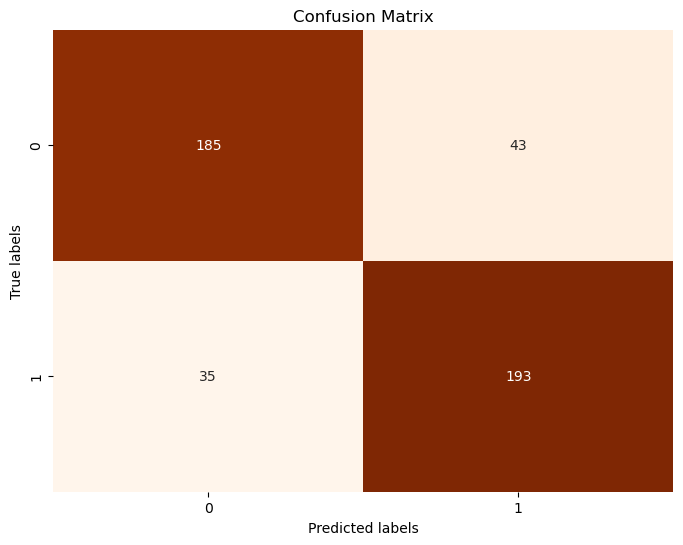

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


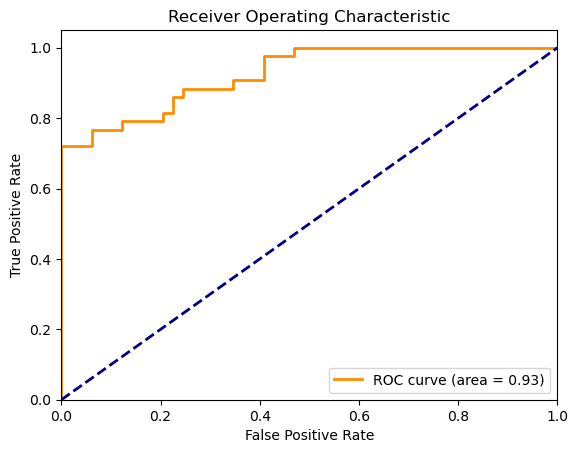

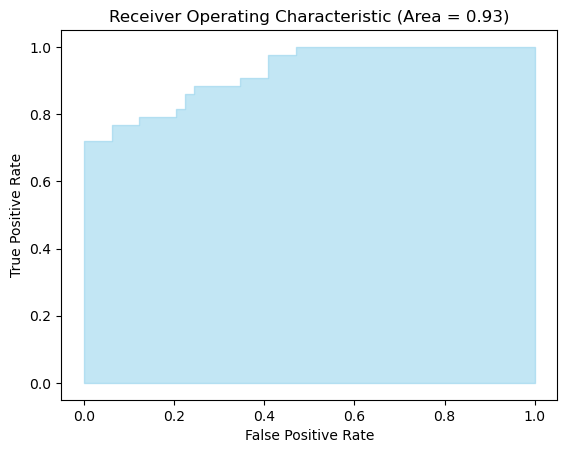

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Accuracy scores for each fold:
Fold 1: 0.611
Fold 2: 0.632
Fold 3: 0.667
Fold 4: 0.765
Fold 5: 0.615
Fold 6: 1.000
Fold 7: 0.769
Fold 8: 0.700
Fold 9: 0.941
Fold 10: 0.667
Fold 11: 0.611
Fold 12: 0.778
Fold 13: 0.800
Fold 14: 0.750
Fold 15: 0.737

Average accuracy: 0.736

Average precision: 0.736
Average Recall: 0.747
Average F1 Score: 0.736


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import csv


svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)


kf = KFold(n_splits=15, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

print("Accuracy scores for each fold:")
for i, score in enumerate(accuracy_scores, 1):
    print(f"Fold {i}: {score:.3f}")

print(f"\nAverage accuracy: {np.mean(accuracy_scores):.3f}")

svm_model.fit(X, Y)


joblib.dump(svm_model, 'svm_model_final.joblib')

Y_preds =svm_model.predict(X)

cm = confusion_matrix(Y, Y_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

svm_model.fit(X, Y)


y_pred_prob = svm_model.predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

plt.fill_between(fpr, tpr, color='skyblue', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Area = %0.2f)' % roc_auc)
plt.show()

accuracy_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

precision_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

recall_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='recall')
f1_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='f1')


print("Accuracy scores for each fold:")
for i, score in enumerate(accuracy_scores, 1):
    print(f"Fold {i}: {score:.3f}")

print(f"\nAverage accuracy: {np.mean(accuracy_scores):.3f}")
print(f"\nAverage precision: {np.mean(precision_scores):.3f}")

print(f"Average Recall: {np.mean(recall_scores):.3f}")
print(f"Average F1 Score: {np.mean(f1_scores):.3f}")

svm_model.fit(X, Y)

joblib.dump(svm_model, 'svm_model_final.joblib')


def save_data(file_path, fpr, tpr, roc_auc):
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(fpr)
        writer.writerow(tpr)
        writer.writerow([roc_auc])

save_data('SVM_roc_data.csv', fpr, tpr, roc_auc)

